# Add some additional layers of information to the hierarchy

Requires DDOT for ontology parsing https://github.com/michaelkyu/ddot/blob/master/examples/Tutorial.ipynb

In [1]:
# load required packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import random

import ndex2
import getpass

from IPython.display import display

# latex rendering of text in graphs
import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

sns.set(font_scale=1.4)

sns.set_style('white')

sns.set_style("ticks", {"xtick.major.size": 15, "ytick.major.size": 15})
plt.rcParams['svg.fonttype'] = 'none'

import sys

# % matplotlib inline

In [2]:
# need ddot to parse the ontology
import ddot
from ddot import Ontology

In [3]:
# ddot only compatible with nx 1.11....
nx.__version__

'2.1'

# Load interactome (needs to be the same one used in previous analysis)

In [4]:


interactome_uuid='275bd84e-3d18-11e8-a935-0ac135e8bacf' # for STRING high confidence
ndex_server='public.ndexbio.org'
ndex_user=None
ndex_password=None
G_PC = ndex2.create_nice_cx_from_server(
            ndex_server, 
            username=ndex_user, 
            password=ndex_password, 
            uuid=interactome_uuid
        ).to_networkx()

# relabel nodes.... this is a nx 1.11 thing...
# G_PC_data = pd.DataFrame.from_dict(dict(G_PC.nodes(data=True)), orient='index')
# G_PC = nx.relabel_nodes(G_PC,dict(zip(G_PC_data.index.tolist(),G_PC_data['name'].tolist())))
# print(G_PC.nodes()[0:5])
# nodes = G_PC.nodes()

# # print out interactome num nodes and edges for diagnostic purposes
# print('number of nodes:')
# print(len(G_PC.nodes()))
# print('\nnumber of edges:')
# print(len(G_PC.edges()))

# ------ nx 2.1 ------
nodes = G_PC.nodes()

# print out interactome num nodes and edges for diagnostic purposes
print('number of nodes:')
print(len(G_PC.nodes()))
print('\nnumber of edges:')
print(len(G_PC.edges()))

number of nodes:
17185

number of edges:
420534


# Load ASD rare-common hierarchy from ndex


In [5]:
ASD_uuid='d27ca9ef-bce5-11eb-9e72-0ac135e8bacf'
ndex_server='public.ndexbio.org'
ndex_user='sbrosenthal@health.ucsd.edu'
ndex_password=getpass.getpass('NDEx password: ')
G_ASD = ndex2.create_nice_cx_from_server(
            ndex_server, 
            username=ndex_user, 
            password=ndex_password, 
            uuid=ASD_uuid
        ).to_networkx()
nodes = G_ASD.nodes()

# print out interactome num nodes and edges for diagnostic purposes
print('number of nodes:')
print(len(G_ASD.nodes()))
print('\nnumber of edges:')
print(len(G_ASD.edges()))

NDEx password: ········
number of nodes:
41

number of edges:
45


In [6]:
G_ASD.nodes()

NodeView(('C438120', 'C438119', 'C438151', 'C438118', 'C438149', 'C438117', 'C438124', 'C438123', 'C438122', 'C438154', 'C438121', 'C438128', 'C438159', 'C438126', 'C438125', 'C438130', 'C438129', 'C438161', 'C438136', 'C438135', 'C438133', 'C438108', 'C438107', 'C438138', 'C438106', 'C438137', 'C438105', 'C438112', 'C438111', 'C438143', 'C438142', 'C438110', 'C438141', 'C438109', 'C438148', 'C438116', 'C438115', 'C438114', 'C438146', 'C438113', 'C438145'))

In [7]:
# add node attributes to dataframe for easier access
ASD_clust_df = pd.DataFrame.from_dict(dict(G_ASD.nodes(data=True)), orient='index')
# relabel nodes in G_ASD
# G_ASD=nx.relabel_nodes(G_ASD,dict(ASD_clust_df['CD_CommunityName']))
ASD_clust_df['system_ID']=ASD_clust_df.index.tolist()
# some columns are not the right type
ASD_clust_df['CD_MemberList_Size']=[int(x) for x in ASD_clust_df['CD_MemberList_Size'].tolist()]
ASD_clust_df['HiDeF_persistence']=[int(x) for x in ASD_clust_df['HiDeF_persistence'].tolist()]
ASD_clust_df.head()

,CD_MemberList,CD_AnnotatedMembers_Size,CD_AnnotatedMembers_Pvalue,CommunityDetectionTally::Unmatched,CD_AnnotatedMembers,CD_CommunityName,CD_AnnotatedMembers_Overlap,HiDeF_persistence,CD_AnnotatedMembers_SourceTerm,CD_MemberList_LogSize,CommunityDetectionTally::ASD_rare_seeds,CD_Labeled,CommunityDetectionTally::ASD_common_seeds,CD_AnnotatedAlgorithm,CD_NonAnnotatedMembers,CD_AnnotatedMembers_SourceDB,CD_MemberList_Size,system_ID
C438120,AP1AR ARL17A ARL4A ARL4D C3orf30 CCDC120 CYTH1...,3,3.9541413915963526E-6,15,CYTH1 CYTH2 IQSEC2,ARF protein signal transduction,0.107,140,GO:0032011,4.087,1,true,1,Annotated by gProfiler [Docker: coleslawndex/c...,AP1AR ARL17A ARL4A ARL4D C3orf30 CCDC120 GOLGA...,GO:BP,17,C438120
C438119,EPYC GPR124 LINGO2 LPHN3 LRRC15 LRRC3 LRRC3B L...,4,1.215110097888934E-7,16,LRRC4C LRRTM2 LRRTM3 LRRTM4,integral component of postsynaptic density mem...,0.065,163,GO:0099061,4.087,1,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,EPYC GPR124 LINGO2 LPHN3 LRRC15 LRRC3 LRRC3B L...,GO:CC,17,C438119
C438151,CTNNAL1 KCNA3 KCNMA1 LRRC10 LRRC26 TMEM245,2,2.0624700942156015E-6,5,KCNMA1 LRRC26,KCNMA1-LRRC26 complex,0.333,15,CORUM:6748,2.585,1,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,CTNNAL1 KCNA3 LRRC10 TMEM245,CORUM,6,C438151
C438118,ABCC8 ABCC9 CDKAL1 CDX1 CTNNB1 DCD FOXA1 FZD7 ...,3,1.6631924655444714E-8,16,ABCC8 ABCC9 KCNJ11,ATP sensitive Potassium channels,0.15,21,REAC:R-HSA-1296025,4.248,3,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,CDKAL1 CDX1 CTNNB1 DCD FOXA1 FZD7 HHEX IGF2BP2...,REAC,19,C438118
C438149,AIF1 DCX GFAP MAP2 ensembl:ENSP00000320295 ens...,0,NaN,5,NaN,(none),0.0,23,NaN,2.585,1,false,0,Annotated by gProfiler [Docker: coleslawndex/c...,NaN,NaN,6,C438149


In [8]:
G_ASD.nodes()

NodeView(('C438120', 'C438119', 'C438151', 'C438118', 'C438149', 'C438117', 'C438124', 'C438123', 'C438122', 'C438154', 'C438121', 'C438128', 'C438159', 'C438126', 'C438125', 'C438130', 'C438129', 'C438161', 'C438136', 'C438135', 'C438133', 'C438108', 'C438107', 'C438138', 'C438106', 'C438137', 'C438105', 'C438112', 'C438111', 'C438143', 'C438142', 'C438110', 'C438141', 'C438109', 'C438148', 'C438116', 'C438115', 'C438114', 'C438146', 'C438113', 'C438145'))

# Add some annotation the the systems 

- Fraction rare/common/neither seeds


## Do we need to pull down the other network for this?

In [9]:
ASD_clust_df.head()

,CD_MemberList,CD_AnnotatedMembers_Size,CD_AnnotatedMembers_Pvalue,CommunityDetectionTally::Unmatched,CD_AnnotatedMembers,CD_CommunityName,CD_AnnotatedMembers_Overlap,HiDeF_persistence,CD_AnnotatedMembers_SourceTerm,CD_MemberList_LogSize,CommunityDetectionTally::ASD_rare_seeds,CD_Labeled,CommunityDetectionTally::ASD_common_seeds,CD_AnnotatedAlgorithm,CD_NonAnnotatedMembers,CD_AnnotatedMembers_SourceDB,CD_MemberList_Size,system_ID
C438120,AP1AR ARL17A ARL4A ARL4D C3orf30 CCDC120 CYTH1...,3,3.9541413915963526E-6,15,CYTH1 CYTH2 IQSEC2,ARF protein signal transduction,0.107,140,GO:0032011,4.087,1,true,1,Annotated by gProfiler [Docker: coleslawndex/c...,AP1AR ARL17A ARL4A ARL4D C3orf30 CCDC120 GOLGA...,GO:BP,17,C438120
C438119,EPYC GPR124 LINGO2 LPHN3 LRRC15 LRRC3 LRRC3B L...,4,1.215110097888934E-7,16,LRRC4C LRRTM2 LRRTM3 LRRTM4,integral component of postsynaptic density mem...,0.065,163,GO:0099061,4.087,1,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,EPYC GPR124 LINGO2 LPHN3 LRRC15 LRRC3 LRRC3B L...,GO:CC,17,C438119
C438151,CTNNAL1 KCNA3 KCNMA1 LRRC10 LRRC26 TMEM245,2,2.0624700942156015E-6,5,KCNMA1 LRRC26,KCNMA1-LRRC26 complex,0.333,15,CORUM:6748,2.585,1,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,CTNNAL1 KCNA3 LRRC10 TMEM245,CORUM,6,C438151
C438118,ABCC8 ABCC9 CDKAL1 CDX1 CTNNB1 DCD FOXA1 FZD7 ...,3,1.6631924655444714E-8,16,ABCC8 ABCC9 KCNJ11,ATP sensitive Potassium channels,0.15,21,REAC:R-HSA-1296025,4.248,3,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,CDKAL1 CDX1 CTNNB1 DCD FOXA1 FZD7 HHEX IGF2BP2...,REAC,19,C438118
C438149,AIF1 DCX GFAP MAP2 ensembl:ENSP00000320295 ens...,0,NaN,5,NaN,(none),0.0,23,NaN,2.585,1,false,0,Annotated by gProfiler [Docker: coleslawndex/c...,NaN,NaN,6,C438149


# System validation with mammalian phenotype ontology + mouse KO data

Parse the ontology, data from http://www.informatics.jax.org/vocab/mp_ontology

In [10]:
from scipy.stats import hypergeom
from statsmodels.stats import contingency_tables

import requests

# find human orthologs of mouse genes
import mygene
mg = mygene.MyGeneInfo()

In [11]:
# download MGI phenotype data
url = 'http://www.informatics.jax.org/downloads/reports/MGI_PhenoGenoMP.rpt'
r = requests.get(url,allow_redirects=True)
open('MGI_PhenoGenoMP.rpt','wb').write(r.content)

43481153

In [12]:
mgi_df = pd.read_csv('MGI_PhenoGenoMP.rpt',sep='\t',
                    names=['MGI_Allele_Accession_ID','Allele symbol','involves','MP','PMID','MGI_marker_accession_ID'])
# extract gene names
gene_name = [a.split('<')[0] for a in mgi_df['Allele symbol'].tolist()]
mgi_df['gene_name']=gene_name
mgi_df.index=mgi_df['gene_name']
mgi_df.head()

,MGI_Allele_Accession_ID,Allele symbol,involves,MP,PMID,MGI_marker_accession_ID,gene_name
gene_name,,,,,,,
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0000600,12529408,MGI:97874,Rb1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001716,16449662,MGI:97874,Rb1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001698,16449662,MGI:97874,Rb1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001092,16449662,MGI:97874,Rb1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0000961,16449662,MGI:97874,Rb1


In [13]:
mouse_genes = list(np.unique(mgi_df['gene_name']))
# mouse_genes = [g for g in mouse_genes if (not g.startswith('+'))]
mg_mapped = mg.querymany(mouse_genes,as_dataframe=True,species=['mouse','human'],scopes='symbol',fields='symbol')
mg_mapped.head()

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-24060...done.
Finished.
34 input query terms found dup hits:
	[('Adam1a', 2), ('Adam1b', 2), ('Ccdc39', 2), ('Chaserr', 2), ('Dnm3os', 2), ('Eldr', 2), ('Fer1l4',
12225 input query terms found no hit:
	['+|Cav1', '+|Cm', '+|Del(10Prmt2-Pdxk)4Yey', '+|Del(11Mpo-Chad)18Brd', '+|Del(11Stat5a-Stat5b)1Mam'
Pass "re

,notfound,_id,_score,symbol
query,,,,
+|Cav1,True,NaN,NaN,NaN
+|Cm,True,NaN,NaN,NaN
+|Del(10Prmt2-Pdxk)4Yey,True,NaN,NaN,NaN
+|Del(11Mpo-Chad)18Brd,True,NaN,NaN,NaN
+|Del(11Stat5a-Stat5b)1Mam,True,NaN,NaN,NaN


In [14]:
# drop genes with no human ortholog
print(len(mg_mapped))
mg_mapped = mg_mapped.dropna(subset=['symbol'])
print(len(mg_mapped))
# drop duplicates
mg_mapped = mg_mapped[~mg_mapped.index.duplicated(keep='first')]
print(len(mg_mapped))
mg_mapped.head()

mgi_df['human_ortholog']=mgi_df['gene_name'].map(dict(mg_mapped['symbol']))
mgi_df.head()

24102
11877
11835


,MGI_Allele_Accession_ID,Allele symbol,involves,MP,PMID,MGI_marker_accession_ID,gene_name,human_ortholog
gene_name,,,,,,,,
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0000600,12529408,MGI:97874,Rb1,RB1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001716,16449662,MGI:97874,Rb1,RB1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001698,16449662,MGI:97874,Rb1,RB1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001092,16449662,MGI:97874,Rb1,RB1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0000961,16449662,MGI:97874,Rb1,RB1


In [15]:
url = 'http://www.informatics.jax.org/downloads/reports/MPheno_OBO.ontology'
r = requests.get(url,allow_redirects=True)
open('MPheno_OBO.ontology','wb').write(r.content)
ddot.parse_obo('MPheno_OBO.ontology',
               'parsed_mp.txt',
              'id2name_mp.txt',
              'id2namespace_mp.txt',
              'altID_mp.txt')

In [16]:
MP2desc = pd.read_csv('id2name_mp.txt',sep='\t',
                      names=['MP','description'],index_col='MP')

MP2desc=MP2desc.loc[MP2desc.index.dropna()] # drop NAN from index
print(len(MP2desc))


MP2desc.head()

14444


,description
MP,
MP:0000001,mammalian phenotype
MP:0000002,obsolete Morphology
MP:0000003,abnormal adipose tissue morphology
MP:0000011,abnormal adipose tissue morphology
MP:0000005,increased brown adipose tissue amount


In [17]:

hierarchy = pd.read_table('parsed_mp.txt',
                          sep='\t',
                          header=None,
                          names=['Parent', 'Child', 'Relation', 'Namespace'])

hierarchy.head()

,Parent,Child,Relation,Namespace
0,MP:0005375,MP:0000003,is_a,MPheno.ontology
1,MP:0001778,MP:0000005,is_a,MPheno.ontology
2,MP:0001781,MP:0000008,is_a,MPheno.ontology
3,MP:0005334,MP:0000010,is_a,MPheno.ontology
4,MP:0000003,MP:0000013,is_a,MPheno.ontology


In [18]:
MPO = Ontology.from_table(
    table=hierarchy,
    parent='Parent',
    child='Child',
    add_root_name='MP:00SUPER',
    ignore_orphan_terms=True)
#MPO.clear_node_attr()
#MPO.clear_edge_attr()

# add description to node attribute
terms_keep = list(np.unique(hierarchy['Parent'].tolist()+hierarchy['Child'].tolist()))
MPO.node_attr=MP2desc.loc[terms_keep]

MPO

0 genes, 13311 terms, 0 gene-term relations, 16806 term-term relations
node_attributes: ['description']
edge_attributes: ['Relation', 'Namespace']

In [19]:
print(len(MPO.node_attr))

13311


In [20]:
# find terms related to brain
MP_focal_list = []
for t in MPO.node_attr.index.tolist():
    descr_temp = MPO.node_attr.loc[t]['description']
    if descr_temp.find('nervous')>-1:
        print(descr_temp)
        MP_focal_list.append(t)
    elif descr_temp.find('neuron')>-1:
        print(descr_temp)
        MP_focal_list.append(t)
    elif descr_temp.find('synapt')>-1:
        print(descr_temp)
        MP_focal_list.append(t)
        
print(len(MP_focal_list))

abnormal nervous system tract morphology
hippocampal neuron degeneration
abnormal motor neuron morphology
motor neuron degeneration
decreased motor neuron number
abnormal motor neuron innervation pattern
peripheral nervous system degeneration
abnormal sensory neuron morphology
decreased sensory neuron number
abnormal sensory neuron innervation pattern
abnormal hair guard neuron morphology
absent hair guard neurons
abnormal hair-tylotrich neuron morphology
abnormal hair-down neuron morphology
absent hair-down neurons
abnormal sympathetic neuron morphology
abnormal adrenergic neuron morphology
abnormal peptidergic neuron morphology
abnormal parasympathetic neuron morphology
abnormal cholinergic neuron morphology
abnormal enteric nervous system morphology
abnormal enteric neuron morphology
abnormal enteric cholinergic neuron morphology
absent enteric neurons
failure of neuromuscular synapse presynaptic differentiation
failure of neuromuscular synapse postsynaptic differentiation
impaired 

In [21]:
# test for enrichment in root node
OR_p_list,OR_CI_list,log_OR_list = [],[],[]
num_genes_in_term_list=[]

MP_keep_list = []

# root node is the largest node
root_node = ASD_clust_df['CD_MemberList_Size'].sort_values(ascending=False).head(1).index.tolist()[0]
# add a negative control phenotype: abnormal skeleton physiology: MP:0001533
for MP_focal in MP_focal_list+['MP:0001533']:
    MP_desc_focal = dict(MP2desc['description'])[MP_focal]

    # focus the hierarchy on one branch, and look up all terms within that branch
    if len(MPO.parent_2_child[MP_focal])>0:
        MPO_focal = MPO.focus(MP_focal,verbose=False)
        focal_terms = MPO_focal.terms
    else: # if the term has no children, just look at that term
        focal_terms=[MP_focal]


    # check enrichment in root node
    focal_genes = ASD_clust_df['CD_MemberList'].loc[root_node].split(' ')
    

    mgi_temp = mgi_df[mgi_df['MP'].isin(focal_terms)]
    mgi_temp = mgi_temp.dropna(subset=['human_ortholog'])
    mgi_genes = list(np.unique(mgi_temp['human_ortholog']))
    mgi_genes = [g.upper() for g in mgi_genes]
    mgi_genes = list(np.intersect1d(mgi_genes,G_PC.nodes()))
    
    if (len(mgi_genes)>10)&(len(mgi_genes)<2000): # only test if there are at least 10 genes, and fewer than 2000 genes
        print('\n'+MP_desc_focal)
        print('number of genes in root node = '+str(len(focal_genes)))
        print('number of genes in focal MPO term = '+str(len(mgi_genes)))

        q00 = len(np.intersect1d(mgi_genes,focal_genes))
        print('number overlapping genes = '+str(q00))
        q01 = len(mgi_genes)-q00

        q10 = len(focal_genes)-q00
        q11 = len(G_PC.nodes())-q00-q01-q10

        table_temp = [[q00,q01],[q10,q11]]
        print(table_temp)

        CT= contingency_tables.Table2x2(table_temp)
        OR_p_temp = CT.log_oddsratio_pvalue()
        OR_CI_temp = CT.log_oddsratio_confint()
        log_OR_temp = CT.log_oddsratio
        print(OR_p_temp)
        print(OR_CI_temp)
        print(log_OR_temp)
        print(len(mgi_genes))

        OR_p_list.append(OR_p_temp)
        OR_CI_list.append(OR_CI_temp)
        log_OR_list.append(log_OR_temp)
        num_genes_in_term_list.append(len(mgi_genes))
        
        MP_keep_list.append(MP_focal)

        print(hypergeom.sf(q00,len(G_PC.nodes()),len(focal_genes),len(mgi_genes)))
    
OR_CI_lower, OR_CI_upper = zip(*OR_CI_list)

root_KO_df = pd.DataFrame({'OR_p':OR_p_list,'log_OR':log_OR_list,
                           'log_OR_CI_lower':OR_CI_lower,'log_OR_CI_upper':OR_CI_upper,
                          'num_genes_in_term':num_genes_in_term_list},
                          index=MP_keep_list)


abnormal nervous system tract morphology
number of genes in root node = 313
number of genes in focal MPO term = 205
number overlapping genes = 14
[[14, 191], [299, 16681]]
6.451333522212983e-07
(0.853766780645048, 1.9629651280189457)
1.4083659543319968
205
5.511785065968047e-06

hippocampal neuron degeneration
number of genes in root node = 313
number of genes in focal MPO term = 27
number overlapping genes = 3
[[3, 24], [310, 16848]]
0.0018384755390037915
(0.7104996845006404, 3.121447105928815)
1.9159733952147278
27
0.001360850927719033

abnormal motor neuron morphology
number of genes in root node = 313
number of genes in focal MPO term = 166
number overlapping genes = 15
[[15, 151], [298, 16721]]
5.522069217032624e-10
(1.1752735487966746, 2.2609215936924256)
1.71809757124455
166
6.43064872465836e-08

motor neuron degeneration
number of genes in root node = 313
number of genes in focal MPO term = 43
number overlapping genes = 3
[[3, 40], [310, 16832]]
0.01953892511583783
(0.22557864


decreased neuron apoptosis
number of genes in root node = 313
number of genes in focal MPO term = 71
number overlapping genes = 4
[[4, 67], [309, 16805]]
0.02296760783796167
(0.1626255041024749, 2.1927589058782972)
1.177692204990386
71
0.009490705863874134

neuron degeneration
number of genes in root node = 313
number of genes in focal MPO term = 401
number overlapping genes = 16
[[16, 385], [297, 16487]]
0.0014061716620264472
(0.3228752312425518, 1.3490062081783993)
0.8359407197104756
401
0.0011451375842274475

loss of hippocampal neurons
number of genes in root node = 313
number of genes in focal MPO term = 15
number overlapping genes = 3
[[3, 12], [310, 16860]]
5.6423361891812204e-05
(1.3397036467701544, 3.879961499143373)
2.6098325729567637
15
0.00012573911789167603

loss of cortex neurons
number of genes in root node = 313
number of genes in focal MPO term = 19
number overlapping genes = 2
[[2, 17], [311, 16855]]
0.013475822576492389
(0.3830955447411861, 3.321991559244127)
1.8525


increased sensory neuron number
number of genes in root node = 313
number of genes in focal MPO term = 51
number overlapping genes = 8
[[8, 43], [305, 16829]]
2.214841698804192e-09
(1.5656752781689693, 3.0919017560148987)
2.328788517091934
51
3.055414199250178e-07

abnormal neuronal migration
number of genes in root node = 313
number of genes in focal MPO term = 127
number overlapping genes = 9
[[9, 118], [304, 16754]]
4.215817335222125e-05
(0.7487006973055502, 2.1231084350506237)
1.435904566178087
127
0.00011104938234429931

abnormal retinal neuronal layer morphology
number of genes in root node = 313
number of genes in focal MPO term = 421
number overlapping genes = 14
[[14, 407], [299, 16465]]
0.02157802870202521
(0.09389884153413541, 1.1836866896507483)
0.6387927655924419
421
0.010600891813836244

abnormal olfactory sensory neuron morphology
number of genes in root node = 313
number of genes in focal MPO term = 24
number overlapping genes = 2
[[2, 22], [311, 16850]]
0.031365843589


nervous system inclusion bodies
number of genes in root node = 313
number of genes in focal MPO term = 62
number overlapping genes = 3
[[3, 59], [310, 16813]]
0.08800935535678324
(-0.15101503384815151, 2.179835479772405)
1.0144102229621268
62
0.026370127612292592

abnormal pyramidal neuron dendrite morphology
number of genes in root node = 313
number of genes in focal MPO term = 14
number overlapping genes = 0
[[0, 14], [313, 16858]]
0.6497077877776991
(-2.1689120191945186, 3.4772578188786616)
0.6541728998420715
14
0.22697108698926372

abnormal hippocampal pyramidal neuron dendrite morphology
number of genes in root node = 313
number of genes in focal MPO term = 11
number overlapping genes = 0
[[0, 11], [313, 16861]]
0.5360328489145436
(-1.9407949191491398, 3.731820714908164)
0.8955128978795122
11
0.18311384260608077

decreased neuronal precursor proliferation
number of genes in root node = 313
number of genes in focal MPO term = 15
number overlapping genes = 1
[[1, 14], [312, 16858]]

In [22]:
root_KO_df['MP_description']=root_KO_df.index.map(dict(MP2desc['description']))

root_KO_df=root_KO_df.sort_values('OR_p')
# root_KO_df=root_KO_df.sort_values('log_OR',ascending=False)
root_KO_df.head(10)

,OR_p,log_OR,log_OR_CI_lower,log_OR_CI_upper,num_genes_in_term,MP_description
MP:0009937,3.503585e-19,1.798440,1.404669,2.192211,321,abnormal neuron differentiation
MP:0002882,2.818545e-18,1.190001,0.922484,1.457519,1502,abnormal neuron morphology
MP:0002272,4.707309e-15,1.641401,1.230770,2.052032,330,abnormal nervous system electrophysiology
MP:0008946,9.967545e-15,1.451961,1.084272,1.819650,502,abnormal neuron number
MP:0002206,2.951031e-14,1.244242,0.923384,1.565101,844,abnormal CNS synaptic transmission
MP:0003635,8.274042e-14,1.159816,0.855338,1.464294,1044,abnormal synaptic transmission
MP:0008948,4.851458e-13,1.456963,1.061965,1.851960,421,decreased neuron number
MP:0002752,1.991863e-11,1.084532,0.767584,1.401479,998,abnormal somatic nervous system morphology
MP:0008947,7.690287e-11,2.139936,1.495323,2.784549,83,increased neuron number
MP:0000965,3.194562e-10,1.281421,0.882069,1.680773,476,abnormal sensory neuron morphology


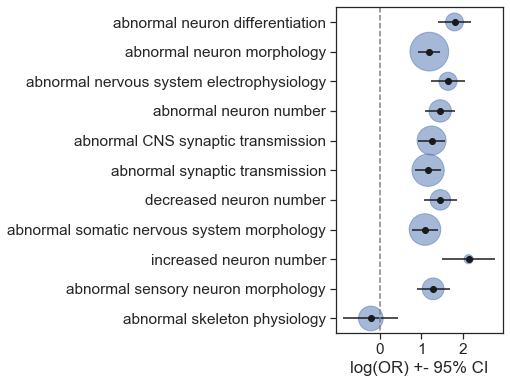

In [29]:
plt.figure(figsize=(3,6))
terms_plot = root_KO_df.head(10).index.tolist()+['MP:0001533'] # top 10 + positive controls

plt.errorbar(root_KO_df.loc[terms_plot]['log_OR'],np.arange(len(terms_plot)),
            xerr=[np.subtract(root_KO_df.loc[terms_plot]['log_OR'],root_KO_df.loc[terms_plot]['log_OR_CI_lower']),
                   np.subtract(root_KO_df.loc[terms_plot]['log_OR_CI_upper'],root_KO_df.loc[terms_plot]['log_OR'])],color='k',fmt='o')
# plt.errorbar(np.arange(len(MP_focal_list)),np.exp(log_OR_list),
#              yerr=[np.subtract(np.exp(log_OR_list),np.exp(OR_CI_lower)),
#                    np.subtract(np.exp(OR_CI_upper),np.exp(log_OR_list))],color='k',fmt='o')
# plt.plot(np.arange(len(MP_focal_list)),np.exp(log_OR_list),'o',color='k')

plt.scatter(root_KO_df.loc[terms_plot]['log_OR'],np.arange(len(terms_plot)),s=root_KO_df.loc[terms_plot]['num_genes_in_term'],alpha=.5)

plt.yticks(np.arange(len(terms_plot)),root_KO_df.loc[terms_plot]['MP_description'])
plt.xticks([0,1,2])
plt.xlabel('log(OR) +- 95% CI')

plt.plot([0,0],[-.5,10.5],'--',color='gray')
plt.ylim([-.5,10.5])

plt.gca().invert_yaxis()
# tmp=plt.xticks(np.arange(len(MP_focal_list)),MP2desc['description'].loc[MP_focal_list].tolist(),rotation='vertical')

# plt.ylabel('OR +- 95% CI')

plt.savefig('figures/ASD_rare_common_mouse_KO_STRING_210608.png',dpi=300,bbox_inches='tight')


In [170]:
np.exp(np.subtract(np.exp(root_KO_df.loc[terms_plot]['log_OR']),np.exp(root_KO_df.loc[terms_plot]['log_OR_CI_lower'])))

MP:0009937     7.142319
MP:0002882     2.163129
MP:0002272     5.688987
MP:0008946     3.721759
MP:0002206     2.592206
MP:0003635     2.309837
MP:0008948     4.058657
MP:0002752     2.233340
MP:0008947    56.719467
MP:0000965     3.273508
MP:0001533     1.476734
dtype: float64

# Test for enrichment in all systems

In [32]:
MP_focal_top = root_KO_df.head(10).index.tolist() # record the top 10

MP_full_results_df=pd.DataFrame(index=ASD_clust_df.index.tolist())

for MP_focal in MP_focal_top:
    MP_desc_focal = dict(MP2desc['description'])[MP_focal]
    print(MP_desc_focal)

    # focus the hierarchy on one branch, and look up all terms within that branch
    if len(MPO.parent_2_child[MP_focal])>0:
        MPO_focal = MPO.focus(MP_focal)
        focal_terms = MPO_focal.terms
    else: # if the term has no children, just look at that term
        focal_terms=MP_focal


    hyper_p_list = []
    num_genes_list = []
    genes_id_list = []

    OR_p_list,OR_CI_list,log_OR_list=[],[],[]
    for focal_cluster in ASD_clust_df.index.tolist():
        #print(focal_cluster)
        mFocal_genes = ASD_clust_df['CD_MemberList'].loc[focal_cluster].split(' ')


        from scipy.stats import hypergeom
        M=len(list(G_PC.nodes())) # only keep genes in PCnet
        # Look up all entries matching focal_terms, and mFocal_genes
        mgi_temp = mgi_df[mgi_df['MP'].isin(focal_terms)]
        mgi_temp = mgi_temp.dropna(subset=['human_ortholog'])
        mgi_genes = list(np.unique(mgi_temp['human_ortholog']))
        new_index=[g.upper() for g in mgi_temp.index.tolist()] 
        mgi_temp.index=new_index

        N=len(np.intersect1d(list(np.unique(mgi_temp.index.tolist())),list(G_PC.nodes()))) # only keep genes in PCnet

        if len(np.intersect1d(mFocal_genes,mgi_temp.index.tolist()))>0:
            mgi_genes = mgi_temp.index.tolist()
            mgi_genes = list(np.intersect1d(mgi_genes,list(G_PC.nodes())))
            x = len(np.intersect1d(mFocal_genes,mgi_genes))
            #print(x)
            n=len(mFocal_genes)

            #mgi_temp['MP_description']=mgi_temp['MP'].map(dict(MP2desc['description']))



            #print(hypergeom.sf(x,M,n,N))
            hyper_p_list.append(hypergeom.sf(x,M,n,N))
            num_genes_list.append(x)
            genes_id_list.append(' '.join(list(np.intersect1d(mFocal_genes,mgi_genes))))

            q00 = len(np.intersect1d(mgi_genes,mFocal_genes))
            q01 = len(mgi_genes)-q00

            q10 = len(mFocal_genes)-q00
            q11 = len(list(G_PC.nodes()))-q00-q01-q10

            table_temp = [[q00,q01],[q10,q11]]

            CT= contingency_tables.Table2x2(table_temp)
            OR_p_temp = CT.log_oddsratio_pvalue()
            OR_CI_temp = CT.log_oddsratio_confint()
            log_OR_temp = CT.log_oddsratio
            #print(OR_p_temp)


            OR_p_list.append(OR_p_temp)
            OR_CI_list.append(OR_CI_temp)
            log_OR_list.append(log_OR_temp)


        else:
            hyper_p_list.append(1)
            num_genes_list.append(0)
            genes_id_list.append('')

            OR_p_list.append(1)
            OR_CI_list.append(0)
            log_OR_list.append(0)



    MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),
                                MP_desc_focal+':-log(OR_p)':-np.log10(OR_p_list),
                                MP_desc_focal+':log_OR':log_OR_list,
                                MP_desc_focal+':num_genes':num_genes_list,
                                MP_desc_focal+':gene_ids':genes_id_list},index=ASD_clust_df.index.tolist())

    if MP_desc_focal+':-log(hyper_p)' not in MP_full_results_df.columns.tolist():
        MP_full_results_df=MP_full_results_df.join(MP_focal_df)


abnormal neuron differentiation
Genes and Terms to keep: 16
abnormal neuron morphology
Genes and Terms to keep: 262
abnormal nervous system electrophysiology
Genes and Terms to keep: 34
abnormal neuron number
Genes and Terms to keep: 55
abnormal CNS synaptic transmission
Genes and Terms to keep: 43
abnormal synaptic transmission
Genes and Terms to keep: 132
decreased neuron number
Genes and Terms to keep: 31
abnormal somatic nervous system morphology
Genes and Terms to keep: 356
increased neuron number
Genes and Terms to keep: 19
abnormal sensory neuron morphology
Genes and Terms to keep: 101


In [33]:
MP_full_results_df.sort_values('abnormal neuron differentiation:num_genes',ascending=False).head()


,abnormal neuron differentiation:-log(hyper_p),abnormal neuron differentiation:-log(OR_p),abnormal neuron differentiation:log_OR,abnormal neuron differentiation:num_genes,abnormal neuron differentiation:gene_ids,abnormal neuron morphology:-log(hyper_p),abnormal neuron morphology:-log(OR_p),abnormal neuron morphology:log_OR,abnormal neuron morphology:num_genes,abnormal neuron morphology:gene_ids,...,increased neuron number:-log(hyper_p),increased neuron number:-log(OR_p),increased neuron number:log_OR,increased neuron number:num_genes,increased neuron number:gene_ids,abnormal sensory neuron morphology:-log(hyper_p),abnormal sensory neuron morphology:-log(OR_p),abnormal sensory neuron morphology:log_OR,abnormal sensory neuron morphology:num_genes,abnormal sensory neuron morphology:gene_ids
C438105,13.480090,18.455487,1.798440,30,ARFGEF1 ASCL1 AUTS2 CDK5R1 CTNNB1 FOXA2 FOXG1 ...,14.945066,17.549975,1.190001,73,ARFGEF1 ASCL1 AUTS2 BARHL2 CADPS2 CAMK2A CDK5R...,...,7.482301,10.114057,2.139936,11,BARHL2 FOXG1 FOXN4 KIF5C LMX1B MAPT NEUROD1 NE...,7.849778,9.495589,1.281421,28,ASCL1 BARHL2 CLCN2 FOXG1 FOXN4 GABRA5 GABRB2 G...
C438106,14.950778,21.558467,2.117357,26,ARFGEF1 ASCL1 CDK5R1 CTNNB1 FOXA2 FOXG1 GFAP G...,19.779656,23.946891,1.581154,63,ARFGEF1 ASCL1 BARHL2 CAMK2A CDK5R1 CLCN2 CTNNB...,...,9.606107,14.329449,2.599394,11,BARHL2 FOXG1 FOXN4 KIF5C LMX1B MAPT NEUROD1 NE...,11.619942,15.480364,1.731444,27,ASCL1 BARHL2 CLCN2 FOXG1 FOXN4 GABRA5 GABRB2 G...
C438109,20.964279,31.442088,3.468482,19,ASCL1 FOXA2 FOXG1 GFAP GSX2 ID2 ID4 INSM1 LHX1...,21.903350,22.399058,2.836042,32,ASCL1 BARHL2 DCX FOXA2 FOXG1 FOXN4 GFAP GSX2 I...,...,11.545715,19.742239,3.722138,8,BARHL2 FOXG1 FOXN4 LMX1B NEUROD1 NEUROG2 NKX2-...,12.411886,17.364374,2.685220,15,ASCL1 BARHL2 FOXG1 FOXN4 GSX2 IRX6 LMX1B NEURO...
C438107,1.913107,1.530864,1.006153,5,ARFGEF1 CDK5R1 GRIA2 MAPT PRNP,2.518393,2.263922,0.742290,17,ARFGEF1 CAMK2A CDK5R1 GRIA2 GRID1 KCNMA1 KCNQ1...,...,1.878191,1.326434,1.434614,2,KIF5C MAPT,1.193513,0.710575,0.597749,5,KCNMA1 KCNQ1 KIF5C MAPT PRSS56
C438108,1.836372,1.407094,1.065531,4,AUTS2 GATA3 KMT2A RNF2,0.876536,0.442860,0.325161,9,AUTS2 CADPS2 DYRK1A GATA3 KLK6 KMT2A RNF2 SNCA...,...,-0.000000,-0.000000,0.000000,0,,0.198322,0.354703,-0.774904,1,GATA3


In [34]:
MP_full_results_df.to_csv('tables/ASD_MP_full_results_210608.txt',sep='\t')

In [36]:
np.power(10,.05)

1.1220184543019633

In [38]:
np.exp(3)

20.085536923187668

# Update hierarchy on ndex

NEED SOPHIE'S HELP WITH THIS

In [130]:
# add new fields as node attributes to hierarchy
MP_full_results_dict = MP_full_results_df.to_dict()


In [139]:
node['n']

'ARF protein signal transduction'

In [133]:
MP_full_results_df.head()

,abnormal neuron differentiation:-log(hyper_p),abnormal neuron differentiation:-log(OR_p),abnormal neuron differentiation:log_OR,abnormal neuron differentiation:num_genes,abnormal neuron differentiation:gene_ids,abnormal neuron morphology:-log(hyper_p),abnormal neuron morphology:-log(OR_p),abnormal neuron morphology:log_OR,abnormal neuron morphology:num_genes,abnormal neuron morphology:gene_ids,...,increased neuron number:-log(hyper_p),increased neuron number:-log(OR_p),increased neuron number:log_OR,increased neuron number:num_genes,increased neuron number:gene_ids,abnormal sensory neuron morphology:-log(hyper_p),abnormal sensory neuron morphology:-log(OR_p),abnormal sensory neuron morphology:log_OR,abnormal sensory neuron morphology:num_genes,abnormal sensory neuron morphology:gene_ids
C438120,-0.000000,-0.000000,0.000000,0,,0.351706,0.168336,-0.427164,1,CYTH1,...,-0.000000,-0.00000,0.000000,0,,-0.000000,-0.000000,0.000000,0,
C438119,-0.000000,-0.000000,0.000000,0,,0.741624,0.180383,0.331252,2,LRRTM1 LRRTM3,...,-0.000000,-0.00000,0.000000,0,,-0.000000,-0.000000,0.000000,0,
C438151,-0.000000,-0.000000,0.000000,0,,1.044046,0.299821,0.736689,1,KCNMA1,...,-0.000000,-0.00000,0.000000,0,,1.972014,1.123636,1.950651,1,KCNMA1
C438118,2.300068,1.828981,1.826671,2,CTNNB1 PITX2,1.680674,1.163320,1.025734,4,CTNNB1 PITX2 PTK7 WNT5A,...,2.427559,1.74961,2.448807,1,PTK7,1.017425,0.287843,0.668938,1,PTK7
C438149,2.304112,1.497508,2.354881,1,GFAP,3.122114,2.391693,2.347588,3,DCX GFAP MAP2,...,-0.000000,-0.00000,0.000000,0,,-0.000000,-0.000000,0.000000,0,


In [157]:
G_ASD_cx = ndex2.create_nice_cx_from_networkx(G_ASD)

In [158]:
# add node attributes to the nice_cx
# for key in MP_full_results_dict.keys():
#     print(key)
#     # set the datatypes
#     if key.find('gene_ids')>-1:
#         data_type='string'
#     else:
#         data_type='double'
#     nx.set_node_attributes(G_ASD_cx,key,MP_full_results_dict[key],type=data_type)
    

for node_id, node in G_ASD_cx.get_nodes():
    data = MP_full_results_df.loc[node['n']]
    print(data)
    for row, value in data.items():
        if row.find('gene_ids')>-1:
            data_type = "string"
            value=str(value)
        else:
            data_type = "double"
            value = str(value) # nice cx can only accept strings as values...
            if value=='inf': # check if inf, set to -1 if so
                value='-1'
            
        #print(value)
        #print(type(value))
        G_ASD_cx.set_node_attribute(node_id, row, value, type=data_type)

abnormal neuron differentiation:-log(hyper_p)                      -0
abnormal neuron differentiation:-log(OR_p)                         -0
abnormal neuron differentiation:log_OR                              0
abnormal neuron differentiation:num_genes                           0
abnormal neuron differentiation:gene_ids                             
abnormal neuron morphology:-log(hyper_p)                     0.351706
abnormal neuron morphology:-log(OR_p)                        0.168336
abnormal neuron morphology:log_OR                           -0.427164
abnormal neuron morphology:num_genes                                1
abnormal neuron morphology:gene_ids                             CYTH1
abnormal nervous system electrophysiology:-log(hyper_p)            -0
abnormal nervous system electrophysiology:-log(OR_p)               -0
abnormal nervous system electrophysiology:log_OR                    0
abnormal nervous system electrophysiology:num_genes                 0
abnormal nervous sys

In [159]:
G_ASD_cx.nodeAttributes

{0: [{'po': 0,
   'n': 'CD_MemberList',
   'v': 'AP1AR ARL17A ARL4A ARL4D C3orf30 CCDC120 CYTH1 CYTH2 GOLGA6L6 GRASP IPCEF1 IQSEC2 POTEB2 TRIM23 ensembl:ENSP00000438507 ensembl:ENSP00000457689 ensembl:ENSP00000478796',
   'd': 'string'},
  {'po': 0, 'n': 'CD_AnnotatedMembers_Size', 'v': '3', 'd': 'string'},
  {'po': 0,
   'n': 'CD_AnnotatedMembers_Pvalue',
   'v': '3.9541413915963526E-6',
   'd': 'string'},
  {'po': 0,
   'n': 'CommunityDetectionTally::Unmatched',
   'v': '15',
   'd': 'string'},
  {'po': 0,
   'n': 'CD_AnnotatedMembers',
   'v': 'CYTH1 CYTH2 IQSEC2',
   'd': 'string'},
  {'po': 0,
   'n': 'CD_CommunityName',
   'v': 'ARF protein signal transduction',
   'd': 'string'},
  {'po': 0, 'n': 'CD_AnnotatedMembers_Overlap', 'v': '0.107', 'd': 'string'},
  {'po': 0, 'n': 'HiDeF_persistence', 'v': '140', 'd': 'string'},
  {'po': 0,
   'n': 'CD_AnnotatedMembers_SourceTerm',
   'v': 'GO:0032011',
   'd': 'string'},
  {'po': 0, 'n': 'CD_MemberList_LogSize', 'v': '4.087', 'd': 'str

In [164]:
G_ASD_cx.set_opaque_aspect('cartesianLayout',{})

In [165]:
#Upload to NDEx
SERVER = input('NDEx server (probably ndexbio.org): ')
USERNAME = input('NDEx user name: ')
PASSWORD = getpass.getpass('NDEx password: ')
network_uuid = G_ASD_cx.upload_to(SERVER, USERNAME, PASSWORD)

NDEx server (probably ndexbio.org): ndexbio.org
NDEx user name: sbrosenthal@health.ucsd.edu
NDEx password: ········
Generating CX


In [162]:
network_uuid

'http://public.ndexbio.org/v2/network/021d8df7-c88c-11eb-9a85-0ac135e8bacf'

In [213]:
# update the network on ndex
ndex_password=getpass.getpass('NDEx password: ') # enter password again (not sure if necessary)
G_ASD_cx.update_to(ASD_uuid,ndex_server,ndex_user,ndex_password)

NDEx password: ········
Generating CX


''

In [214]:
G_ASD_cx.update_to?


0.0